# What are the most common skills required for Data Analyst roles in the U.S., and how do these skills influence salary?

In [57]:
# Importing the needed libraries

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import ast
from wordcloud import WordCloud


%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
# Load the data
data_loaded = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Project_Data_Jobs_Analysis_2023\Data\data_jobs.csv')

# Filter Data for Data Analyst Jobs listed in the United States
df_USA = data_loaded[(data_loaded['job_country'] == 'United States') &
                     (data_loaded['job_title_short'] == 'Data Analyst')].copy()

# From the info viewed, the job_posted_date column is showed as an object(str)
# We will transform the date column to have datetime as a data type

df_USA['job_posted_date'] = pd.to_datetime(df_USA['job_posted_date'])

# Adding a month column to the data
df_USA['job_posted_month'] = df_USA['job_posted_date'].dt.month_name()
df_USA['job_posted_day'] = df_USA['job_posted_date'].dt.day_name()

# Checking the data type of the job_skills
print("The data type of the job_skills column is:",type(df_USA['job_skills'][68]))

# Viewing the values under job_skills we are suppose to have a list (68 because that is the first None NA value)
# Cleaning the data job_skills values

df_USA['job_skills'] = df_USA['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


df_USA_cleaned = df_USA.dropna(subset=['salary_year_avg', 'job_skills']).reset_index().drop('index', axis =1).copy()


# View the head of the data
print('Shape of the data:',(df_USA_cleaned.shape))
df_USA_cleaned.head()

The data type of the job_skills column is: <class 'str'>
Shape of the data: (3868, 19)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
0,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",October,Thursday
1,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}",February,Monday
2,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '...",January,Tuesday
3,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr...",November,Tuesday
4,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog...",October,Tuesday


In [35]:

df_USA_cleaned['num_skills'] = df_USA_cleaned['job_skills'].apply(lambda skill: len(skill) if type(skill) == list else skill)
df_USA_cleaned['normalized_salary'] = df_USA_cleaned['salary_year_avg']/df_USA_cleaned['num_skills']

df_skills_explde = df_USA_cleaned.explode('job_skills')

df_skills_explde.sample(5)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,...,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day,num_skills,normalized_salary
1851,Data Analyst,Data Analyst III,"Topanga, CA",via ComputerJobs,Full-time,False,"California, United States",2023-05-06 16:00:41,False,True,...,year,90250.0,NaN,Centene Corporation,excel,"{'analyst_tools': ['excel'], 'programming': ['...",May,Saturday,2,45125.0
1516,Data Analyst,Data Analyst,"Austin, TX",via Dice,Contractor,False,"Texas, United States",2023-01-27 23:02:24,True,False,...,year,37500.0,NaN,BayOne Solutions,github,"{'analyst_tools': ['tableau', 'excel', 'power ...",January,Friday,6,6250.0
717,Data Analyst,Data Management Analyst III,"Gainesville, FL",via Indeed,Full-time,False,Georgia,2023-07-19 15:32:59,False,False,...,year,77500.0,NaN,University of Florida,sql,"{'analyst_tools': ['sas'], 'programming': ['sq...",July,Wednesday,4,19375.0
2903,Data Analyst,Program Management Data Analyst,"Trinity, FL",via JobServe,Full-time,False,"Florida, United States",2023-01-17 12:03:25,False,False,...,year,91960.0,NaN,Citi,sas,"{'analyst_tools': ['sas', 'sharepoint', 'excel...",January,Tuesday,4,22990.0
3478,Data Analyst,Data Analyst,"Fort Lauderdale, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-04-14 21:02:05,False,False,...,year,110000.0,NaN,AutoNation,azure,"{'cloud': ['oracle', 'aws', 'azure'], 'databas...",April,Friday,5,22000.0


In [41]:
df_skills = df_skills_explde[['job_skills','job_title', 'salary_year_avg']]

df_skills.sample(5)

,job_skills,job_title,salary_year_avg
2835,databricks,Automations Data Analyst (REMOTE),125000.0
3855,tableau,DEA Data Analyst 2 - US Citizens Only,70500.0
1222,sheets,Mid-Level Data Analyst,150000.0
2569,sas,Data Analyst,84725.5
2068,tableau,Data Analyst,95329.0


In [59]:
# Now you can calculate the average normalized salary per skill
skill_salary_avg = df_skills_explde.groupby('job_skills').agg(
    count = ('job_skills', 'size'),
    Average_salary = ('normalized_salary', 'mean')).sort_values(by = 'count', ascending=False).head(20)

skill_salary_avg


,count,Average_salary
job_skills,,
sql,2508,26174.213268
excel,1808,26339.951362
python,1431,22085.173500
tableau,1364,22060.091936
sas,926,15762.502783
r,893,19883.421560
power bi,838,20732.138617
powerpoint,462,18967.253630
word,461,19140.854207


In [73]:
skill_salary_avg_sorted = skill_salary_avg.sort_values(by = 'Average_salary', ascending=False)

fig = px.bar(data_frame=skill_salary_avg_sorted, x = skill_salary_avg_sorted.index, y = 'Average_salary',
             color_discrete_sequence=['darkgreen'],
             title= "Avearge Salary of Job Skills per year",
             labels = {'job_skills':'Job Skills', 'Average_salary': 'Yearly Average Salary ($USD)'})

fig.update_layout(paper_bgcolor = 'white', plot_bgcolor = 'white')
fig.show()


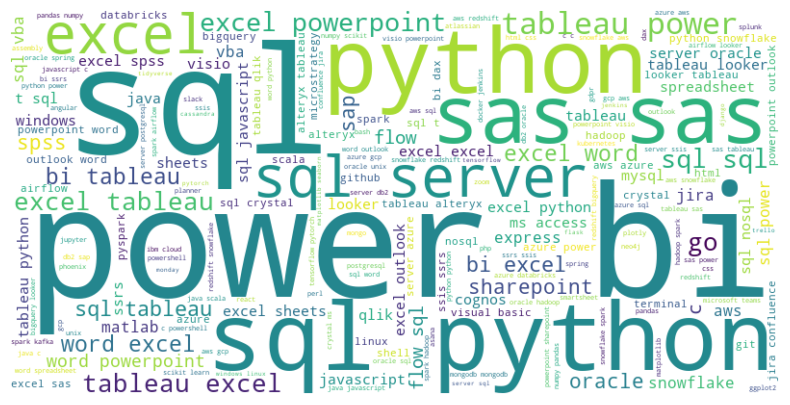

In [80]:
# Convert job_skills into a single string
all_skills = ' '.join(df_skills_explde['job_skills'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()
